In [144]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Define power-law function

In [145]:
def power_law(_img, gamma, _plot=True):
    n_bytes = _img.itemsize
    c = (2**(n_bytes*8)-1)**(1-gamma)
    transformed_img = np.zeros(shape=_img.shape, dtype=_img.dtype)
    # Perform power law
    transformed_img = (c*(_img)**gamma).astype(_img.dtype)
    return transformed_img

### Load noisy image

In [146]:
skeleton_img = cv2.imread('salt-and-pepper-Skeleton.png', cv2.IMREAD_GRAYSCALE)

### Display the noisy image

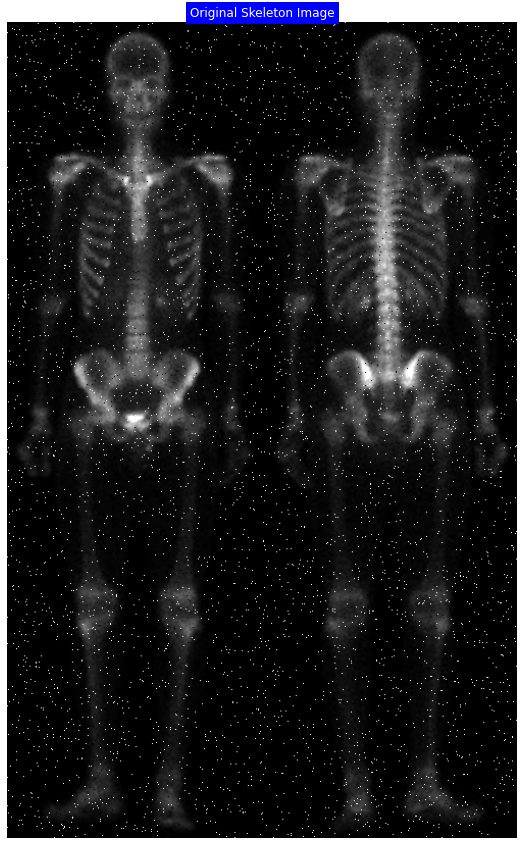

In [147]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Original Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(skeleton_img, cmap = 'gray', vmin=0, vmax=2**(skeleton_img.itemsize*8)-1)

### Eliminate noise by applying median filter

In [148]:
median_filtered_img = cv2.medianBlur(skeleton_img, 3)

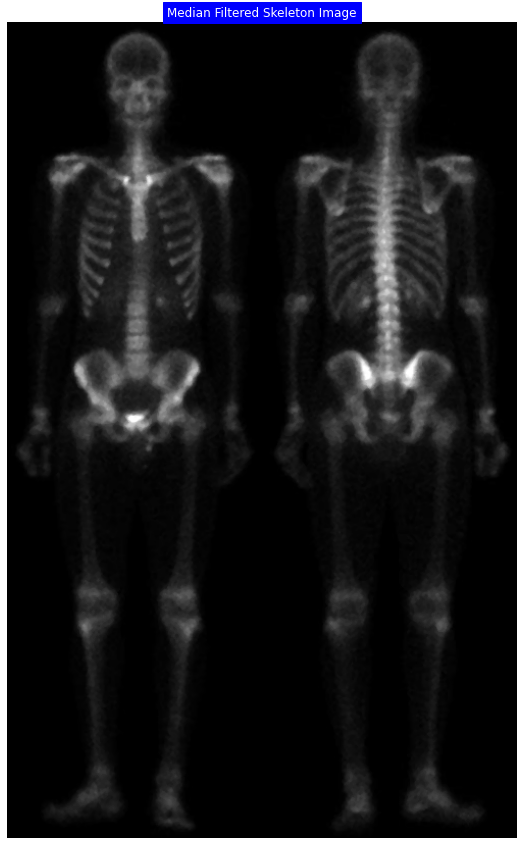

In [149]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Median Filtered Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(median_filtered_img, cmap = 'gray', vmin=0, vmax=2**(median_filtered_img.itemsize*8)-1)

### Enhance the clarity of long bones using Laplacian sharpening
- **Objective**: To sharpen the long bones in a medical image, enhancing their clarity for better medical assessment.
- **Functionality**: Utilizes Laplacian sharpening techniques to emphasize the edges and details of the long bones.
- **Output**: A medical image where the long bones appear more distinct and clear, facilitating easier diagnosis and assessment.


##### Laplacian kernel

In [150]:
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

In [151]:
# Apply laplacian kernel
laplacian_img = cv2.filter2D(src=median_filtered_img, ddepth=cv2.CV_64F, kernel=kernel)

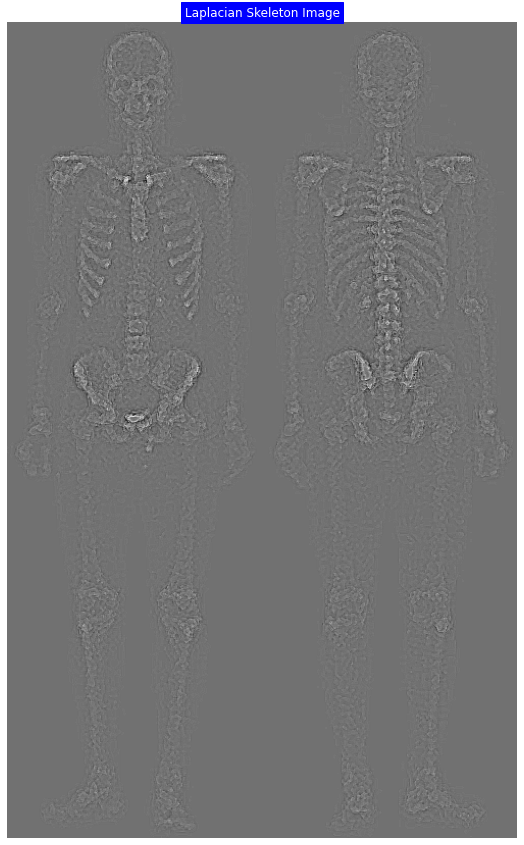

In [152]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Laplacian Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(laplacian_img, cmap = 'gray', vmin=laplacian_img.min(), vmax=laplacian_img.max())

### Sharpen

In [153]:
sharpened = median_filtered_img + laplacian_img

In [154]:
sharpened = sharpened - np.min(sharpened)
sharpened = sharpened * (255.0/np.max(sharpened))

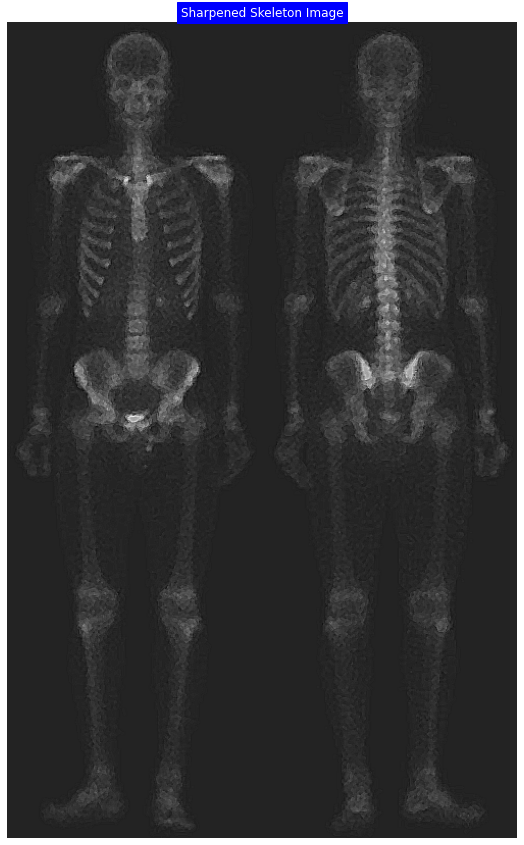

In [155]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Sharpened Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(sharpened, cmap = 'gray', vmin=sharpened.min(), vmax=sharpened.max())

### Apply Sobel filters in the X-direction (SobelX) and Y-direction (SobelY) to enhance the visibility of vertical and horizontal bones in the image.

##### Sobelx

In [157]:
sobelx_img = cv2.Sobel(median_filtered_img, cv2.CV_64F, 1, 0, ksize=3)
sobelx_img = cv2.convertScaleAbs(sobelx_img)

In [158]:
# treating gradient image as mask image and multiplying it with the sharpened image 
sobelx_img = sobelx_img*sharpened

In [159]:
# final sharpened image by adding the masked image to the original image
sobelx_img = sobelx_img + median_filtered_img

In [160]:
# obtaining Gamma Corrected final image by using power-law transformation
sobelx_img_gamma_corr = power_law(sobelx_img, 0.75)

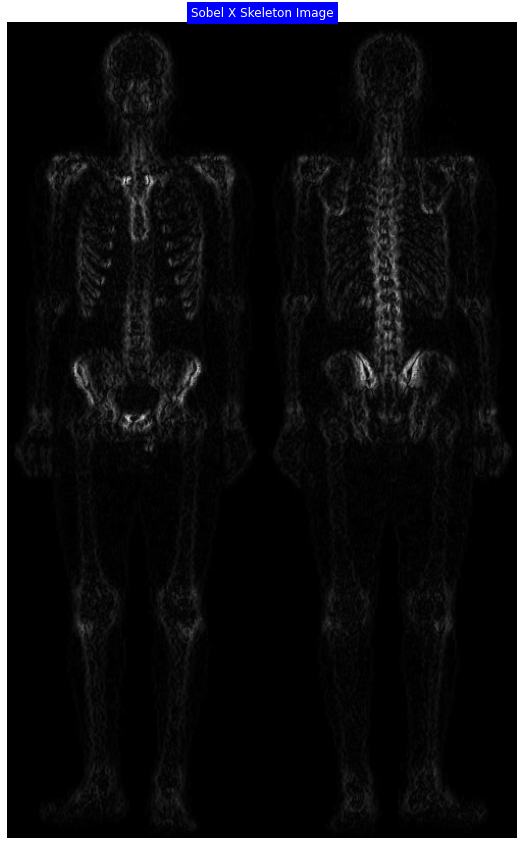

In [161]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Sobel X Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(sobelx_img_gamma_corr, cmap = 'gray', vmin=sobelx_img_gamma_corr.min(), vmax=sobelx_img_gamma_corr.max())

##### Sobely

In [163]:
sobely_img = cv2.Sobel(median_filtered_img, cv2.CV_64F, 0, 1, ksize=3)
sobely_img = cv2.convertScaleAbs(sobely_img)

In [164]:
# treating gradient image as mask image and multiplying it with the sharpened image
sobely_img = sobely_img*sharpened

In [165]:
# final sharpened image by adding the masked image to the original image
sobely_img = sobely_img + median_filtered_img

In [166]:
# obtaining Gamma Corrected final image by using power-law transformation
sobely_img_gamma_corr = power_law(sobely_img, 0.75)

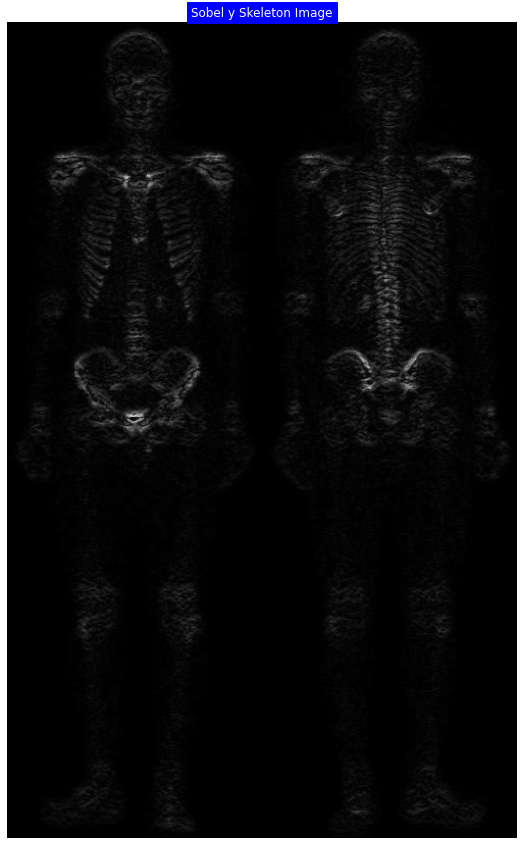

In [167]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Sobel y Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(sobely_img_gamma_corr, cmap = 'gray', vmin=sobely_img_gamma_corr.min(), vmax=sobely_img_gamma_corr.max())

### Apply power-law transformation to increase brightness and enhance the visibility of muscles that are in the darker regions of the image.

##### Combine results of SobelX and SobelY filters to highlight the edge details in the image.

In [168]:
# adding both directional gradients
grad = cv2.addWeighted(sobelx_img, 0.5, sobely_img, 0.5, 0)

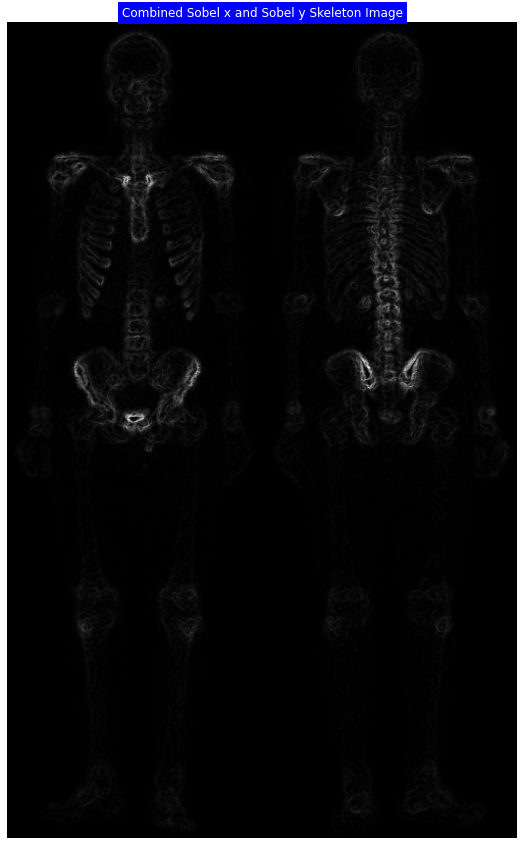

In [169]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Combined Sobel x and Sobel y Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(grad, cmap = 'gray', vmin=grad.min(), vmax=grad.max())

In [170]:
# applying power-law
dst = power_law(grad, 0.5)

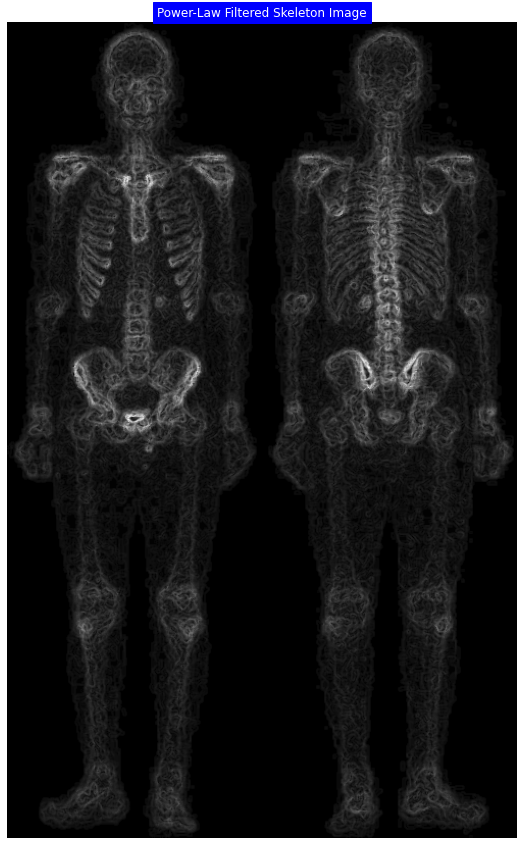

In [171]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Power-Law Filtered Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(dst, cmap = 'gray', vmin=dst.min(), vmax=dst.max())